# 求解

In [1]:
include("..//src//HermiteFEM.jl");

case::Case = Case();
@time u::Vector{Float64} = solve(case);
@time x_minor::Vector{Float64}, w_minor::Vector{Float64}, theta_minor::Vector{Float64} = interpolation_minor(case, u);

  0.084004 seconds (35.78 k allocations: 1.797 MiB, 99.31% compilation time)
  0.000077 seconds (468 allocations: 43.391 KiB)


# 绘图

In [2]:
import PyPlot as plt;
image_path::String = "..//image//";
xticks::Vector{Float64} = Vector(0.: 0.02: 0.24);
figsize::Tuple{Int64, Int64} = (12, 4);

# 解析解

In [3]:
function analytical_theta(x::Float64)::Float64
    theta::Float64 = 0.;
    if 0 <= x < 0.12
        theta = -0.00419174*x^3 - 0.999404*x^2 + 0.243843*x;
    elseif 0.12 <= x <= 0.24
        theta = -5.38543 * x^2 + 1.31177 * x - 0.0649994;
    else
        theta = 0.;
    end
    return theta;
end

function analytical_w(x::Float64)::Float64
    w::Float64 = 0.;
    if 0 <= x < 0.12
        w = -0.00104793 * x^4 - 0.333135 * x^3 + 0.121922 * x^2;
    elseif 0.12 <= x <= 0.24
        w = -1.79514 * x^3 + 0.655884 * x^2 - 0.0649994 * x + 0.00263701;
    else
        w = 0.;
    end
    return w;
end

x_analytical::Vector{Float64} = Vector(0.: 0.001: 0.24);
theta_analytical::Vector{Float64} = analytical_theta.(x_analytical);
w_analytical::Vector{Float64} = analytical_w.(x_analytical);

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


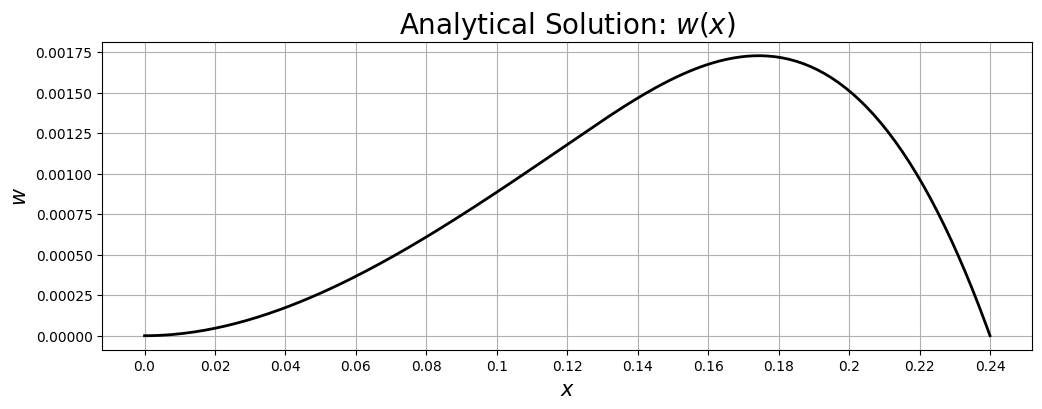

In [4]:
plt.figure(figsize=figsize, facecolor="white");
plt.plot(x_analytical, w_analytical, color="k", lw=2);
plt.grid(true);
plt.xticks(xticks, xticks);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$w\$", fontsize=15);
plt.title("Analytical Solution: \$w(x)\$", fontsize=20);
plt.savefig(image_path * "analytical_w.png", bbox_inches="tight");
plt.savefig(image_path * "analytical_w.pdf", bbox_inches="tight");
plt.show()

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


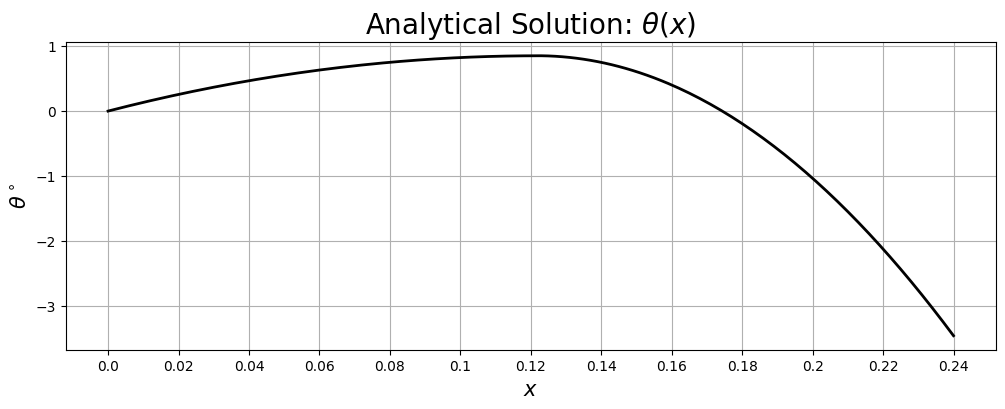

In [5]:
plt.figure(figsize=figsize, facecolor="white");
plt.plot(x_analytical, theta_analytical .* 180/pi, color="k", lw=2);
plt.grid(true);
plt.xticks(xticks, xticks);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$\\theta^\\circ\$", fontsize=15);
plt.title("Analytical Solution: \$\\theta(x)\$", fontsize=20);
plt.savefig(image_path * "analytical_theta.png", bbox_inches="tight");
plt.savefig(image_path * "analytical_theta.pdf", bbox_inches="tight");
plt.show()

# Julia 解

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


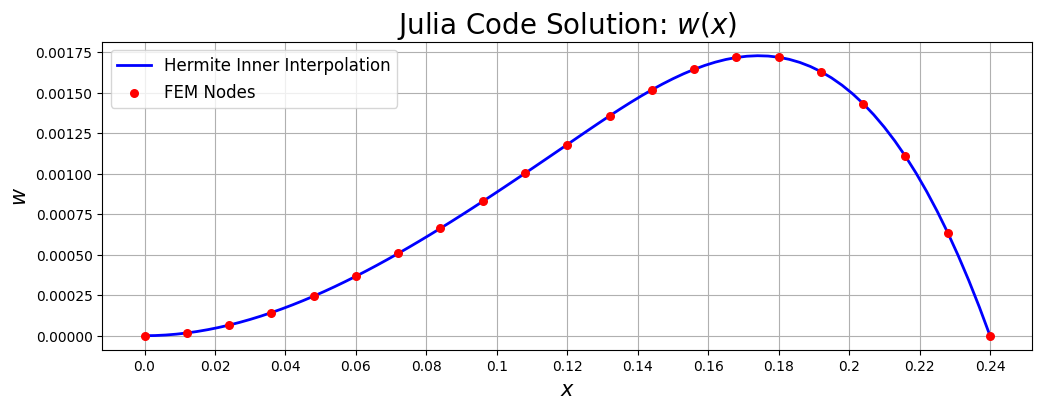

In [6]:
plt.figure(figsize=figsize, facecolor="white");
plt.plot(x_minor, w_minor, color="b", lw=2, label="Hermite Inner Interpolation");
plt.scatter(case.x, u[1:2:end], s=30, color="r", zorder=10, label="FEM Nodes");
plt.legend(loc="upper left", fontsize=12);
plt.xticks(xticks, xticks);
plt.grid(true);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$w\$", fontsize=15);
plt.title("Julia Code Solution: \$w(x)\$", fontsize=20);
plt.savefig(image_path * "julia_w.png", bbox_inches="tight");
plt.savefig(image_path * "julia_w.pdf", bbox_inches="tight");
plt.show();

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


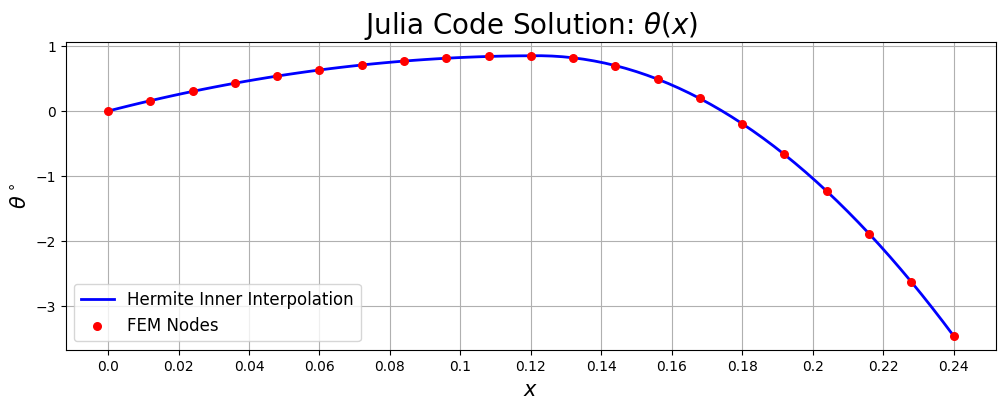

In [7]:
plt.figure(figsize=figsize, facecolor="white");
plt.plot(x_minor, theta_minor .* 180/pi, color="b", lw=2, label="Hermite Inner Interpolation");
plt.scatter(case.x, u[2:2:end] .* 180/pi, s=30, color="r", zorder=10, label="FEM Nodes");
plt.legend(loc="lower left", fontsize=12);
plt.xticks(xticks, xticks);
plt.grid(true);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$\\theta^\\circ\$", fontsize=15);
plt.title("Julia Code Solution: \$\\theta(x)\$", fontsize=20);
plt.savefig(image_path * "julia_theta.png", bbox_inches="tight");
plt.savefig(image_path * "julia_theta.pdf", bbox_inches="tight");
plt.show();

# 比对

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


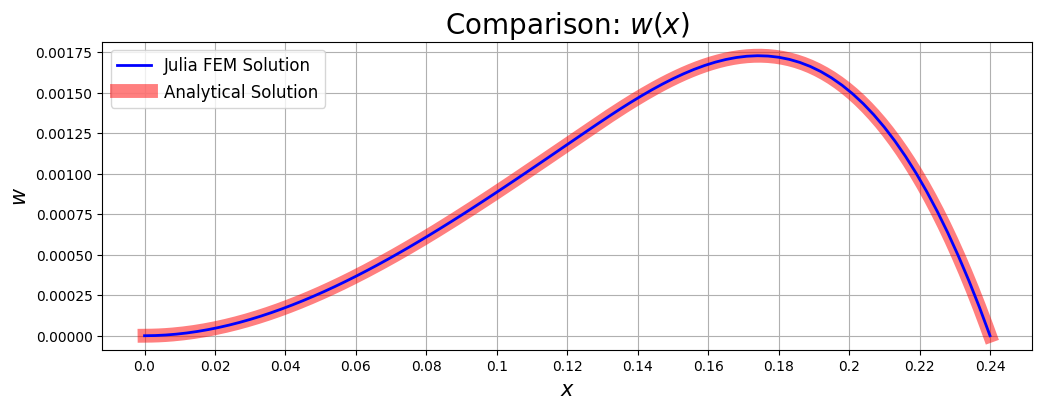

In [8]:
plt.figure(figsize=figsize, facecolor="white");
plt.plot(x_minor, w_minor, color="b", lw=2, label="Julia FEM Solution", zorder=10);
plt.plot(x_analytical, w_analytical, color="r", lw=10, alpha=0.5, label="Analytical Solution");
plt.legend(loc="upper left", fontsize=12);
plt.xticks(xticks, xticks);
plt.grid(true);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$w\$", fontsize=15);
plt.title("Comparison: \$w(x)\$", fontsize=20);
plt.savefig(image_path * "comparison_w.png", bbox_inches="tight");
plt.savefig(image_path * "comparison_w.pdf", bbox_inches="tight");
plt.show();

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


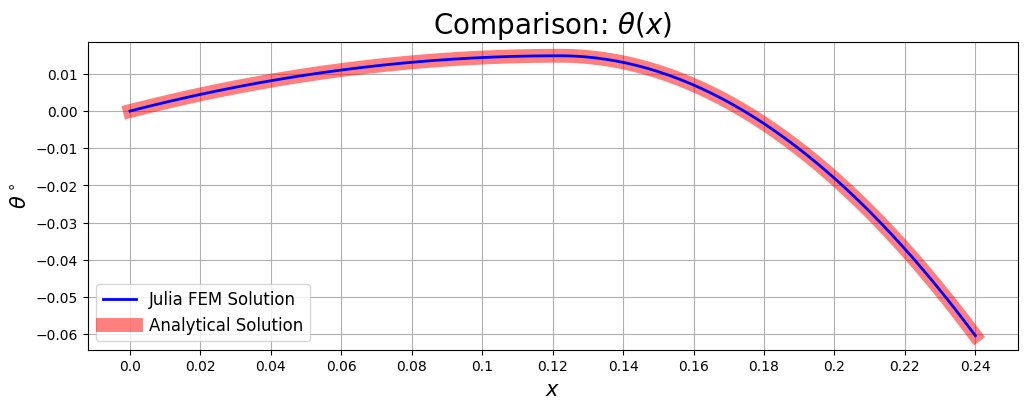

In [9]:
plt.figure(figsize=figsize, facecolor="white");
plt.plot(x_minor, theta_minor, color="b", lw=2, label="Julia FEM Solution", zorder=10);
plt.plot(x_analytical, theta_analytical, color="r", lw=10, alpha=0.5, label="Analytical Solution");
plt.legend(loc="lower left", fontsize=12);
plt.xticks(xticks, xticks);
plt.grid(true);
plt.xlabel("\$x\$", fontsize=15);
plt.ylabel("\$\\theta^\\circ\$", fontsize=15);
plt.title("Comparison: \$\\theta(x)\$", fontsize=20);
plt.savefig(image_path * "comparison_theta.png", bbox_inches="tight");
plt.savefig(image_path * "comparison_theta.pdf", bbox_inches="tight");
plt.show();